In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies_df = pd.read_csv('imdb_top_1000.csv')
movies_df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


### Data Preprocessing

In [5]:
movies_df.duplicated().sum()

0

In [6]:
movies_df = movies_df.drop(['Poster_Link', 'Certificate', 'Overview', 'Certificate', 'Runtime'], axis=1)

In [7]:
movies_df.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [8]:
movies_df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

One of the movies is missing its release year. We enter the correct year below.

In [10]:
movies_df[movies_df['Released_Year']=='PG']

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [11]:
movies_df['Released_Year'].replace({'PG':'1995'},inplace=True)

In [12]:
movies_df['Released_Year']=movies_df['Released_Year'].astype(int)

In [13]:
# Apply the function to remove commas and convert to integer
movies_df['Gross'] = movies_df['Gross'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) and x != '' else None)
movies_df

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


##### Each movie has its own set of labels which are combined into a single string. We want to ensure that each genre is its own string.

In [15]:
genres = movies_df['Genre'].unique().tolist()

In [16]:
y=[i.split(', ') for i in genres]

In [17]:
genres = []
for i in y:
    for j in i:
        genres.append(j)

In [18]:
genres_set = set(genres)

In [19]:
genres = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Family','Fantasy','Film-Noir','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western']

## Exploratory Data Analysis

### What movie is rated highest on IMDB?

In [22]:
mean_ratings = movies_df.groupby('Series_Title')[['IMDB_Rating']].mean()

In [23]:
highest_rated = mean_ratings['IMDB_Rating'].idxmax()
movies_df[movies_df['Series_Title']==highest_rated]

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0


### 'The Shawshank Redemption' is the highest rated movie with a IMDB rating of 9.3

#### Below is a summary of highest rated movies on IMDB.

In [26]:
movies_df.groupby('Series_Title',sort=False)[['IMDB_Rating']].mean().reset_index().head(10)

,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0
5,The Lord of the Rings: The Return of the King,8.9
6,Pulp Fiction,8.9
7,Schindler's List,8.9
8,Inception,8.8
9,Fight Club,8.8


#### We're interested in seeing how many movies from each decade are represented in our list for each year in the decade.

In [28]:
ninties = []

for i in range(1990, 2000):
    count_releases = movies_df[movies_df['Released_Year'] == i].shape[0]

    ninties.append(count_releases)

print(ninties)

twothousands = []

for i in range(2000, 2010):
    count_releases = movies_df[movies_df['Released_Year'] == i].shape[0]

    twothousands.append(count_releases)

print(twothousands)

twothousandtens = []

for i in range(2010, 2020):
    count_releases = movies_df[movies_df['Released_Year'] == i].shape[0]

    twothousandtens.append(count_releases)

print(twothousandtens)


[8, 12, 12, 23, 13, 20, 10, 19, 17, 17]
[19, 27, 19, 22, 31, 17, 26, 26, 21, 29]
[23, 18, 24, 28, 32, 25, 28, 22, 19, 23]


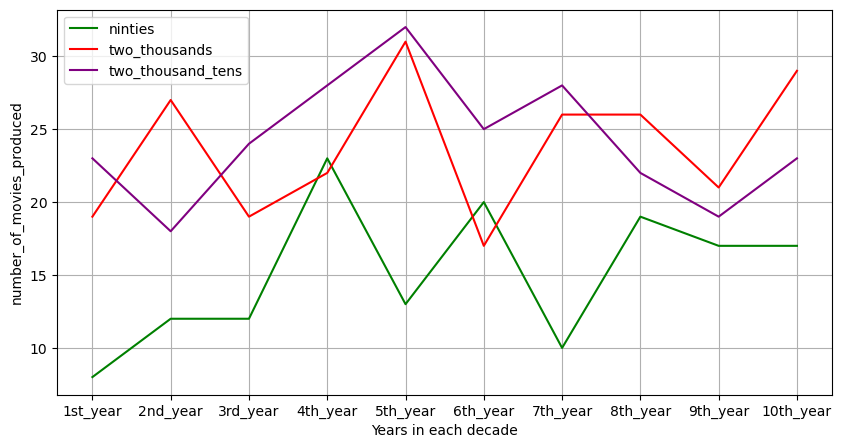

In [29]:
x_labels = ['1st_year','2nd_year','3rd_year','4th_year','5th_year','6th_year','7th_year','8th_year','9th_year','10th_year']
plt.figure(figsize=(10,5))
plt.plot(ninties, color='green',label='ninties')
plt.plot(twothousands, color='red',label = 'two_thousands')
plt.plot(twothousandtens, color='purple',label = 'two_thousand_tens')
plt.xlabel('Years in each decade')
plt.xticks(ticks=range(len(x_labels)), labels=x_labels)
plt.ylabel('number_of_movies_produced')

plt.legend(loc="upper left")
# add grid
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

**Insight:** Movies from the 2000s and 2010s are more heavily represented compared to those from the 1990s. This could indicate that more movies were produced during the 2000s and 2010s, increasing the likelihood that some of these films would make it onto our list. Alternatively, it may suggest an improvement in the quality of movies over time. Perhaps the 1990s decade paved the way for higher quality films.

Another factor to consider is the advancement of special effects. As technology improved, special effects became more realistic, which is particularly important for genres like science fiction and horror. The increased use of advanced special effects may have contributed to attracting larger audiences, leading to a greater number of movies from the 2000s and 2010s being included in our list.

#### Let's see how average domestic gross has changed since the ninties.

In [32]:
yearly_avg_90s=[]
for i in range(1990,2000):
	yearly_mean = movies_df[movies_df.Released_Year==i].Gross.mean()
	yearly_avg_90s.append(yearly_mean)
print(f"90s yearly mean:{yearly_avg_90s}")
yearly_avg_00s=[]
for i in range(2000,2010):
	yearly_mean = movies_df[movies_df.Released_Year==i].Gross.mean()
	yearly_avg_00s.append(yearly_mean)
print(f"2000s yearly mean:{yearly_avg_00s}")
yearly_avg_10s=[]
for i in range(2010,2020):
	yearly_mean = movies_df[movies_df.Released_Year==i].Gross.mean()
	yearly_avg_10s.append(yearly_mean)
print(f"2000s yearly mean:{yearly_avg_10s}")

90s yearly mean:[94786081.875, 64991846.25, 74118714.7, 54205877.77272727, 79000382.0, 56707011.941176474, 25387709.555555556, 74673755.05882353, 34791235.47058824, 74865442.52941176]
2000s yearly mean:[53335434.0, 83912756.72, 62439931.833333336, 70809610.52380952, 49884501.137931034, 68251296.26666667, 49970265.125, 39175921.16, 107535644.11764705, 117486823.4]
2000s yearly mean:[113191903.72727273, 60685896.61111111, 121076954.14285715, 47605822.11111111, 88891265.19354838, 107058124.69565217, 112850322.82608695, 103065642.6, 186268383.0, 150421418.0]


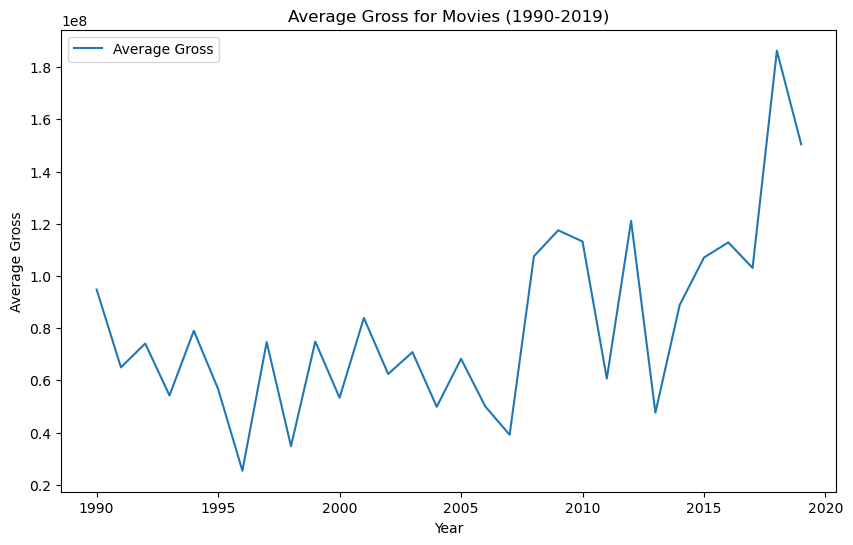

In [33]:
combined_data = yearly_avg_90s + yearly_avg_00s + yearly_avg_10s
all_years = list(range(1990, 2020))
plt.figure(figsize=(10, 6))
plt.plot(all_years, combined_data, label='Average Gross')

plt.title('Average Gross for Movies (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Average Gross')

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show();


**Insight:** Unsurprisingly, the average domestic gross has seen unprecedented growth in the last decade. However, we do observe a sharp decrease. This is consistent with trends in recent decades which suggest that shortly after an increase, there is a sharp decrease that follows.

### Who is listed as the lead actor most frequently?

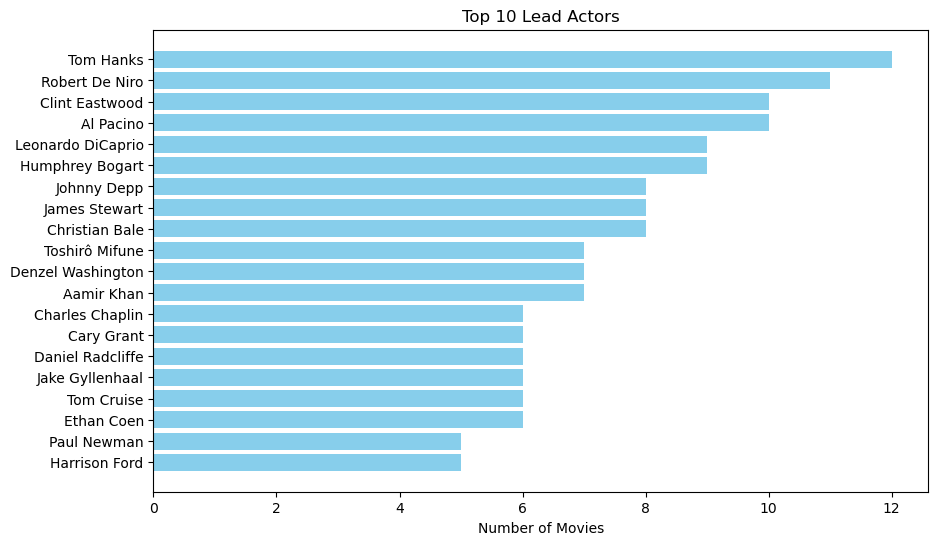

In [36]:
top_actors = movies_df.groupby('Star1')[['Series_Title']].count().reset_index().sort_values(by='Series_Title', ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(top_actors['Star1'], top_actors['Series_Title'], color='skyblue')  # Horizontal bar graph

plt.xlabel('Number of Movies')
plt.title('Top 10 Lead Actors')
plt.gca().invert_yaxis()  # Invert the y-axis to have the actor with the most movies at the top
plt.show()

#### Tom Hanks is the most popular lead actor.

In [38]:
star2_df = movies_df.groupby('Star2')[['Series_Title']].count().reset_index().sort_values(by='Series_Title',ascending=False).head(10)

In [39]:
star3_df = movies_df.groupby('Star3')[['Series_Title']].count().reset_index().sort_values(by='Series_Title',ascending=False).head(10)

In [40]:
star4_df = movies_df.groupby('Star4')[['Series_Title']].count().reset_index().sort_values(by='Series_Title',ascending=False).head(10)

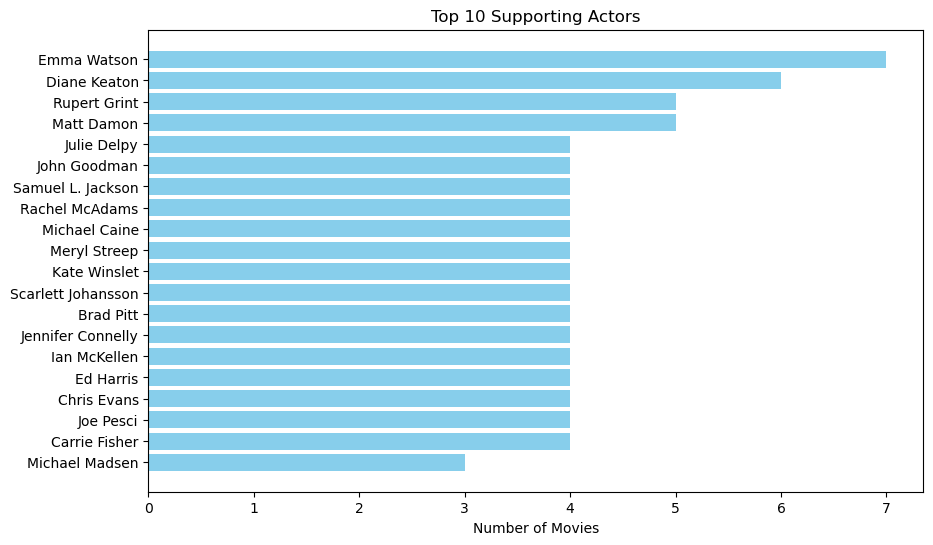

In [41]:
star2_df_renamed = star2_df.rename(columns={'Star2': 'Star'})
star3_df_renamed = star3_df.rename(columns={'Star3': 'Star'})
star4_df_renamed = star4_df.rename(columns={'Star4': 'Star'})


combined_df = pd.concat([star2_df_renamed, star3_df_renamed, star4_df_renamed])
combined_df = combined_df.groupby('Star').sum().reset_index()
combined_df = combined_df.sort_values(by='Series_Title', ascending=False)

top_supporting_actors = combined_df.head(20)

plt.figure(figsize=(10,6))
plt.barh(top_supporting_actors['Star'], top_supporting_actors['Series_Title'], color='skyblue')  # Horizontal bar graph

plt.xlabel('Number of Movies')
plt.title('Top 10 Supporting Actors')
plt.gca().invert_yaxis()  # Invert the y-axis to have the actor with the most movies at the top
plt.show()

#### Emma Watson is the most frequently listed supporting actor

#### Below we see a summary of the movies with the highest and lowest number of votes

In [44]:
movies_df.groupby('Series_Title')[['No_of_Votes']].mean().reset_index().sort_values(by='No_of_Votes',ascending=False)

,Series_Title,No_of_Votes
875,The Shawshank Redemption,2343110.0
766,The Dark Knight,2303232.0
374,Inception,2067042.0
274,Fight Club,1854740.0
620,Pulp Fiction,1826188.0
...,...,...
623,Raazi,25344.0
660,Scarface: The Shame of the Nation,25312.0
452,La planète sauvage,25229.0
306,God's Own Country,25198.0


In [45]:
movies_df.groupby('Director')[['Series_Title']].count().reset_index().sort_values(by='Series_Title',ascending=False).head(10)

,Director,Series_Title
22,Alfred Hitchcock,14
470,Steven Spielberg,13
179,Hayao Miyazaki,11
313,Martin Scorsese,10
9,Akira Kurosawa,10
463,Stanley Kubrick,9
532,Woody Allen,9
49,Billy Wilder,9
391,Quentin Tarantino,8
83,Christopher Nolan,8


#### Alfred Hitchcock directed the highest number of movies

In [47]:
avg_rating_by_genre = movies_df.groupby('Genre')
most_voted = movies_df['No_of_Votes'].max()
average = movies_df['IMDB_Rating'].mean()
highest_metascore = movies_df.groupby('Genre')[['IMDB_Rating']].max()#movies_df['Meta_score'].max()
print(f"Average rating across all genres: {round(average,1)}")
print(f"Movie with highest number of votes: {highest_rated}")

Average rating across all genres: 7.9
Movie with highest number of votes: The Shawshank Redemption


In [48]:
genres = np.unique(', '.join(movies_df['Genre']).split(', '))
genres = np.delete(genres, np.where(genres == 'NA'))

In [49]:
for genre in genres:
    movies_df[genre] = movies_df['Genre'].str.contains(genre).astype('int')

movies_df.drop('Genre', axis=1, inplace=True)

In [50]:
movies_df

,Series_Title,Released_Year,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Shawshank Redemption,1994,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,...,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,2008,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,...,0,0,0,0,0,0,0,0,0,0
3,The Godfather: Part II,1974,9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,1957,9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,...,0,0,0,0,1,0,0,0,0,0
996,Giant,1956,7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,...,0,0,0,0,0,0,0,0,0,1
997,From Here to Eternity,1953,7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,...,0,0,0,0,1,0,0,0,1,0
998,Lifeboat,1944,7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,...,0,0,0,0,0,0,0,0,1,0


In [51]:
sum_of_genre_entries = []

for genre in genres:
    count = len(movies_df[movies_df[genre] == 1])
    sum_of_genre_entries.append(count)

print(f"{genres.tolist()} \n {sum_of_genre_entries}")

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'] 
 [189, 196, 82, 109, 233, 209, 724, 56, 66, 19, 56, 32, 47, 17, 99, 125, 67, 19, 137, 51, 20]


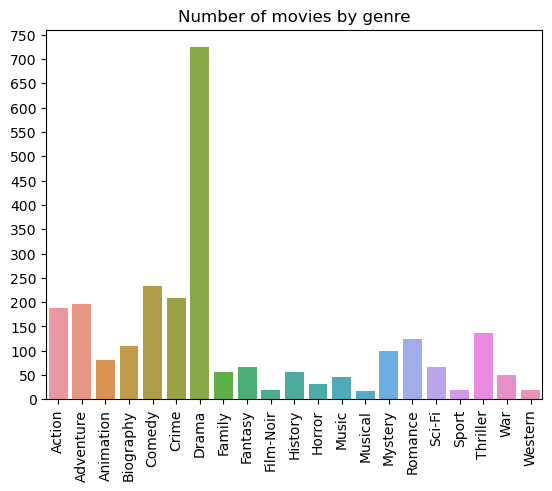

In [52]:
sns.barplot(x=genres,y=sum_of_genre_entries)
plt.xticks(rotation=90)
yticks = np.arange(0, 800,50)
plt.yticks(ticks=yticks)
plt.title("Number of movies by genre")
plt.show();

#### Drama dominates the list followed by Comedy and Crime.

In [54]:
year_int = [int(s) for s in movies_df['Released_Year']]

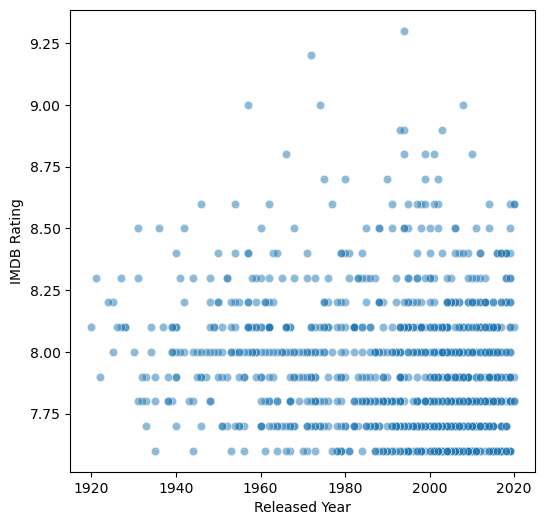

In [55]:
plt.figure(figsize=(6, 6))
sns.scatterplot(movies_df, x=year_int,y='IMDB_Rating',alpha=.5)
plt.xlabel("Released Year")
plt.ylabel("IMDB Rating");

### We see that the majority of movies rated 8.5-9 were released around the early 2000s.

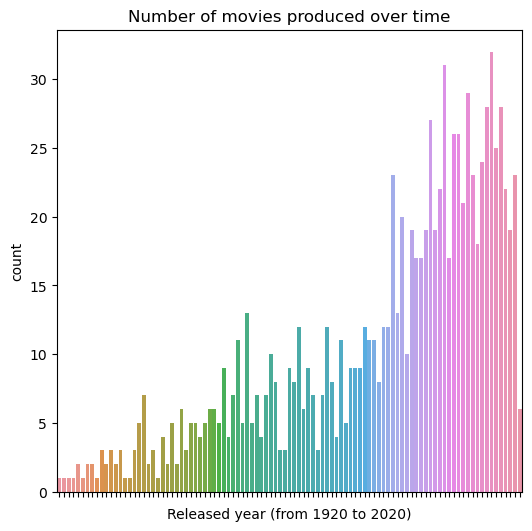

In [57]:
plt.figure(figsize=(6, 6))
ax = plt.gca()

sns.countplot(data=movies_df, x='Released_Year', ax=ax)

ax.set_xticklabels([])
ax.set_xticks(ax.get_xticks())
plt.xlabel("Released year (from 1920 to 2020)")
plt.title("Number of movies produced over time")

plt.show()

### Unsurprisingly, the frequency of movies produced has increased since the early days of cinema.